In [1]:
import torch
import torchvision

In [2]:
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])
print(x*y)

tensor([10.,  3.])


In [3]:
x= torch.zeros([2,5])
print (x)
y = torch.rand([2,5])
print(y)
print(y.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[0.5839, 0.1253, 0.5851, 0.1895, 0.0693],
        [0.9456, 0.9204, 0.2998, 0.8230, 0.8547]])
torch.Size([2, 5])


* Tensor is basically a multidimensional array.
* Torch is pretty similar to numpy when it come to manipulating multidimensional arrays/matrices. 
* Torch treats a model as a class.
* One of the interesting things where most people get stuck is how to resize the tensor.
* We use the resize() function in numpy and tensorflow to resize the multidimensional array.
* This is not the case in pytorch


In [4]:
y= torch.rand([2,5])
# in order to change the shape of the tensor
print(y, y.shape)
new_y = y.view([1,10])
print ("\n",new_y, new_y.shape)

tensor([[0.9763, 0.9395, 0.3090, 0.5681, 0.6180],
        [0.6318, 0.4340, 0.4061, 0.1712, 0.1654]]) torch.Size([2, 5])

 tensor([[0.9763, 0.9395, 0.3090, 0.5681, 0.6180, 0.6318, 0.4340, 0.4061, 0.1712,
         0.1654]]) torch.Size([1, 10])


In [5]:
# performing data analysis on the mnist dataset
from torchvision import transforms, datasets
''' essential that we feed the neural network with out of sample data because if by chance your model overfits then it will cause a high variance problem and lead to inaccuracy''' 
#train = datasets.MNIST("",train=True,download = True,transform=transforms.Compose([transforms.ToTensor()]))
#test =  datasets.MNIST("",train=False, download = True,transform=transforms.Compose([transforms.ToTensor()])) 
train = datasets.MNIST("",train=True, transform=transforms.Compose([transforms.ToTensor()]))
test =  datasets.MNIST("",train=False, transform=transforms.Compose([transforms.ToTensor()])) 

In [6]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
test

Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

* batchsize is how much samples we want to pass to our model at one time
* we cannot pass the whole data to our model in one go 
* we eventually hope that our data will generslize and we can get important insights from it 
* the data is passed through multiple hidden layers the neuron a mini function who's coefficient has to be learned along the way gets updated. 
* mnist 28*28 pixel size 

In [8]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test , batch_size=10, shuffle=True)

In [9]:
for data in trainset:
    k= data
    break

# Pytorch
### This is where people get confused. First we can flatten or reshape our tensor using the view() function unlike the reshape function which is present in tensorflow and numpy 
### When we load our dataset trainset and divide it into different bathes of size 10 (so that model does not generalize in one step and we optimize it by decreasing the variance by training the model in multiple steps) we are essentially storing the pixel data in the first position and the image labels in the second position.

* When we are loading the dataset we have need to take care of the array dimension while loading the dataset the dimension looks like this (batch_size ,1, input_x_dim , input_y_dim ) 


In [10]:
# image pixel data is stored in the zeroith position 
k[0].shape

torch.Size([10, 1, 28, 28])

In [11]:
# image label data is stored in the first postiion 
k[1].shape

torch.Size([10])

In [12]:
x, y = data[0][0] , data[1][0]
print(x.shape,y)

torch.Size([1, 28, 28]) tensor(3)


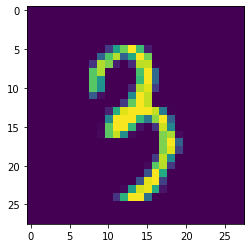

In [13]:
import matplotlib.pyplot as plt 
# while viewing the image it has to be reshaped
plt.imshow(x.view((28,28)))


# Data-set Balancing and Exploratory Data Analysis...

### If the model can find a shorter path to figuring out some- decreasing loss ( the model has no clue/knowledge of what the lowest loss could be, so as the optimizer is trying to decrease our loss it doesn't know how good the model might get it will just try to decrease the loss as best and easy  as possible.

In [14]:
total =0 
counter =0
batch_size = 10 
counter_dict =dict()
for data in trainset:
    xs, ys = data
    for y in ys:
        if int(y) not in counter_dict:
            counter_dict[int(y)]=1
        else:
            counter_dict[int(y)]+=1

In [15]:
counter_dict

{1: 6742,
 8: 5851,
 4: 5842,
 0: 5923,
 5: 5421,
 3: 6131,
 9: 5949,
 6: 5918,
 2: 5958,
 7: 6265}

In [16]:
counter_dict  = dict(sorted(counter_dict.items()))

In [17]:
# Dictionary after sorting, we can infer the data is fairly balance we are not dealing with a imbalanced dataset
counter_dict

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [18]:
# percentage distribution
for k in counter_dict:    
    print("{} : {}".format(k, 100* counter_dict[k]/sum(counter_dict.values())))

0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915


### torch.nn is more of your object-oriented programming 
### torch.nn.functional is more of just like functions


In [19]:
import torch.nn as nn 
import torch.nn.functional as f 


In [20]:
for data in trainset:
    k= data
    break 


In [21]:
k[0].shape

torch.Size([10, 1, 28, 28])

In [22]:
k[0][0][0].shape
# this represents the image width and height 

torch.Size([28, 28])

In [23]:
# essentially we are finding how many columns exist in that particular row 
# from this we get the number of columns
no_of_columns =  (k[0][0][0][0].shape)[0]
print("{} column size ".format(no_of_columns))

28 column size 


In [24]:
# we are taking the first column fixing the rows as it is 
# from this we get the number of rows in our input image
no_of_rows =(k[0][0][0][:][0].shape)[0]
print("{} row size ".format(no_of_rows))

28 row size 


In [25]:
print("we have {} rows and {} columns in our input image".format(no_of_rows, no_of_columns)) 


we have 28 rows and 28 columns in our input image


In [33]:
class Net(nn.Module):
    def __init__(self):
        # we will be initializing nn.Module
        # super corresponds to nn.Module and all this is doing is running the initialization for nn.Module as well as whatever else we happen to put in it so when you inherit 
        #we inherit the attributes and methods, but the thing is the initialization method is not run so if we want to run the initialization method of the parent class where you
        #are inheriting from we run super().__init()
        super().__init__()
        # our target here is to make 3 layers of 64 neurons 
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    # how do we want the data to be passed through the network    
    def forward(self, x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.relu(self.fc3(x))
        x = (self.fc4(x))
        return f.log_softmax(x, dim =1)
        
net = Net()
print(net)
        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [29]:
x= torch.rand((28,28))
print(x)

tensor([[6.6434e-01, 3.9315e-01, 5.9357e-01, 5.2465e-01, 9.0466e-01, 1.4477e-01,
         2.6345e-04, 8.1851e-01, 5.1584e-01, 3.0812e-01, 8.2280e-01, 4.0412e-01,
         2.7832e-01, 8.5781e-02, 8.3084e-01, 8.8054e-01, 1.3005e-01, 8.4183e-01,
         9.3988e-01, 5.9443e-01, 5.9447e-01, 4.1345e-01, 9.4908e-01, 8.9821e-01,
         5.1221e-01, 1.8951e-01, 4.3788e-01, 9.9039e-01],
        [2.4170e-01, 9.9509e-02, 3.2735e-01, 5.8523e-01, 5.7452e-01, 4.0969e-01,
         1.8818e-01, 4.7152e-01, 4.5249e-01, 9.0625e-01, 1.9248e-01, 8.7680e-01,
         1.0728e-01, 8.9536e-01, 2.3268e-01, 9.3541e-01, 1.3964e-01, 2.1629e-01,
         9.2844e-02, 2.7483e-01, 7.0906e-01, 8.3801e-01, 1.7777e-01, 6.3821e-01,
         4.2462e-01, 2.4545e-01, 2.7352e-01, 2.2570e-01],
        [4.7464e-01, 9.4392e-01, 1.9781e-01, 2.8121e-01, 1.5899e-01, 4.1462e-01,
         9.4971e-01, 3.8725e-01, 6.0880e-01, 4.7611e-02, 3.1511e-01, 7.3059e-01,
         3.5898e-01, 5.4743e-01, 8.4320e-01, 5.6258e-01, 3.9977e-01, 3.121

In [30]:
x =x.view(1,28*28)
print(x)

tensor([[6.6434e-01, 3.9315e-01, 5.9357e-01, 5.2465e-01, 9.0466e-01, 1.4477e-01,
         2.6345e-04, 8.1851e-01, 5.1584e-01, 3.0812e-01, 8.2280e-01, 4.0412e-01,
         2.7832e-01, 8.5781e-02, 8.3084e-01, 8.8054e-01, 1.3005e-01, 8.4183e-01,
         9.3988e-01, 5.9443e-01, 5.9447e-01, 4.1345e-01, 9.4908e-01, 8.9821e-01,
         5.1221e-01, 1.8951e-01, 4.3788e-01, 9.9039e-01, 2.4170e-01, 9.9509e-02,
         3.2735e-01, 5.8523e-01, 5.7452e-01, 4.0969e-01, 1.8818e-01, 4.7152e-01,
         4.5249e-01, 9.0625e-01, 1.9248e-01, 8.7680e-01, 1.0728e-01, 8.9536e-01,
         2.3268e-01, 9.3541e-01, 1.3964e-01, 2.1629e-01, 9.2844e-02, 2.7483e-01,
         7.0906e-01, 8.3801e-01, 1.7777e-01, 6.3821e-01, 4.2462e-01, 2.4545e-01,
         2.7352e-01, 2.2570e-01, 4.7464e-01, 9.4392e-01, 1.9781e-01, 2.8121e-01,
         1.5899e-01, 4.1462e-01, 9.4971e-01, 3.8725e-01, 6.0880e-01, 4.7611e-02,
         3.1511e-01, 7.3059e-01, 3.5898e-01, 5.4743e-01, 8.4320e-01, 5.6258e-01,
         3.9977e-01, 3.1211e

In [31]:
x.shape

torch.Size([1, 784])

In [34]:
output = net(x)

In [37]:
output

tensor([[-2.3138, -2.3170, -2.3429, -2.2312, -2.3625, -2.2599, -2.2296, -2.3649,
         -2.1807, -2.4526]], grad_fn=<LogSoftmaxBackward>)

## Before moving ahead we need to take into consideration is the loss and optimizer function. Loss function tells how much off your model is from the actual prediction. Optimizer adjusts the weights of the neurons based on the loss and gradients, it wants to adjust and optimize all of the possible weights that it can adjust in such a way to lower the loss slowly over time based on the learning rate we have used. 

` Optimizers: Adam optimizer` 
  Adam will be taking in two parameters one is the net.parameter this corresponds to everything that is adjustable in our model, there are things that don't necessarily have to be adjustable. 
 This is true in the case of transfer learning examples where we have have a model pre-trained already on a specific domain and has learned the initial layers of the model has learnt all the low level features of the images such as edges, contrast etc. So the initial layers will be very good at smal and general types of image recognition task, and the laters layers will be learning closed domain specification/features. In transfer learning we freeze the initial layers create the bottleneck structure and the optimizer optimizes the weights only in the last few layers. 
 
 ` Learning Rate `
  Learning rate dictates the size of the step that your optimizer to get to the minima. So anytime you pass data through this normal neural network you get a loss, it is entirely possible to calculate what loss do we need for loss to be zero, to get perfect accuracy on the data we just sent, that is a simple mathematical operation. We need to determine the weights for our loss to be zero, to get perfect accuracy on the data we just sent. This is a simple mathematical operation which we don't want to perform as it would certainly lead to overfitting the model to our data points, a classical problem of the bias-variance problem which plagues every machine learning algorithm. So we use the optimizer to optimize, lower the loss but only take some certain size steps and then over time as we take those steps and the changes that were made basically based on,these steps will get overwritten as we are passing our data in batches. We need to optimize out learning rate because if we take a higher learning rate/step the model will never converge. If we take smaller steps it will never reach the global minima. 
  
  ## But there is really no way to say that the model will reach the global minima( basically the perfect size step to reach the global minima) 
  ` so what we do in more generally more complicated tasks is we do what's called a decaying learning rate and the way this works is it starts off with these gigantic steps but over time the learning rate decreases `
  

In [40]:
import torch.optim as optim 
 
optimizer = optim.Adam(net.parameters(), lr = 0.001) # 1e-03 

EPOCHS = 3 

for epochs in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels 
        x, y = data 
        net.zero_grad()
        output = net(x.view(-1,28*28))
        loss = f.nll_loss(output, y)
        # backpropogating the weights to each neuron adjusting the weights relative to how much each neuron contributed to the loss
        loss.backward()
        # this will adjust the weights for us 
        optimizer.step()
    print(loss)
        



tensor(0.0232, grad_fn=<NllLossBackward>)
tensor(0.0784, grad_fn=<NllLossBackward>)
tensor(0.1949, grad_fn=<NllLossBackward>)


` We need to take extra precautions when we are deciding what loss function we have to use in our neural netowork. There are two major ways to calculate loss in a model `
* One is based on ONE HOT ENCODING (one hot vectors)
* The other is the normal probability distribution(pdf) vector like in this case. 

Our goal mostly is to use one hot encoded vectors. 

` If our input labels are one hot encoded it is safer to say that we should be using MSE loss (generally)`

#### So it is safe to say that if your data is a scalar value like tensor(4) and not tensor( [ 0  0  0  1  0  0  0  0  0  0 ] ) just use NLL loss but if your data is a one hot vector use MSE.

